In [11]:
# Importing numpy, pandas for sorting data into matrices and matplot and seaborn libraries for visualization; 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%pylab inline
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Helper functions:

# plots correlation as heatmap
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

# def plot_distribution( df ):
    

In [6]:
# loading titanic data as pandas dataframe
titanic_df = pd.read_csv('titanic_data.csv')

# data preview
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Survivors on record, survivor biases
survivors = titanic_df.loc[titanic_df['Survived'] == 1] 

female_survivors = survivors.groupby(['Sex'],as_index=False).sum()


# Selecting data with ints only
titanic_without_strings = titanic_df.drop(['Cabin','Name','Ticket','PassengerId','Embarked'], axis=1)

# replacing Nans
passengers = titanic_without_strings.groupby(['Sex'])
median_age = passengers.sum()['Age'].median()
# print median_age

titanic_without_nan = passengers.fillna(median_age)
# print titanic_without_nan
# titanic_without_nan.head()

# Mean, std dev, and others;
titanic_without_nan.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2130.036717,32.204208,0.381594,2.308642,0.523008,0.383838
std,4220.826388,49.693429,0.806057,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,2.000000,0.000000,0.000000
50%,32.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,54.000000,31.000000,0.000000,3.000000,1.000000,1.000000
max,10602.585000,512.329200,6.000000,3.000000,8.000000,1.000000


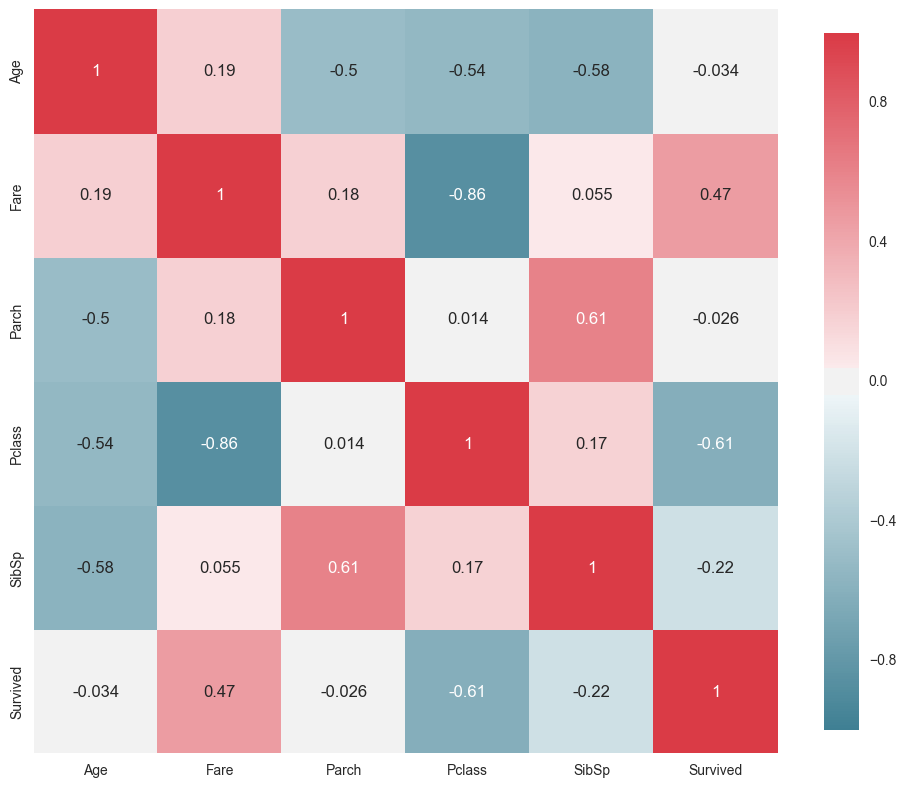

In [27]:
# Studying correlation between variables

correlated_variables = titanic_without_nan.corr()
plot_correlation_map(correlated_variables)

# heatmap shows important variables for consideration. 
# based on plot, positive correlation between survival and fare, 
# and negative correlation between survival and class. 

In [ ]:
# relation between fare and survivability

